## Midterm 2 - MNIST Classification
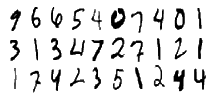
### Preparing environment and dataset:
* pip install python-mnist
* create folder midterm/data
* download from https://drive.google.com/open?id=1AQwyy3xP7rjDWMPkWBW4kKOfpkIyAWt8 - 4 files
* extract all files to ./data

#### The error of your classifier on test dataset must be better then 12.0% LeCun et al. 1998
#### Enter your error at https://goo.gl/forms/r52T6newOqn1Wcw03
#### Commit your code to github/bitbucket into folder midterm


In [9]:
from mnist import MNIST
import random
mndata = MNIST('data')

trimages, trlabels = mndata.load_training()
teimages, telabels = mndata.load_testing()
index = random.randrange(0, len(trimages))  # choose an index ;-)
print('The amount of train images',len(trimages))
print('The amount of test images',len(teimages))
print('The label of random image',trlabels[index],'The random image is',mndata.display(trimages[index]))
print('Images are binary with 28*28 = ',len(trimages[index]))

The amount of train images 60000
The amount of test images 10000
The label of random image 5 The random image is 
............................
............................
............................
............................
............................
............................
............................
............................
............................
....................@@@@....
...............@.@@@@@@@....
..............@@@@..........
.............@@@............
...........@@@@.............
..........@@@@@.............
...........@@.@.............
.............@@.............
............@@@.............
.......@@.@@@...............
......@@@@@@................
......@@....................
............................
............................
............................
............................
............................
............................
............................
Images are binary with 28*28 =  784


Using TensorFlow backend.
/Users/nikita/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


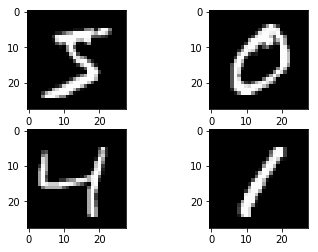

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
import numpy
import random
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras import backend as K

K.set_image_dim_ordering('th')
seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras import backend as K

model = Sequential()

#Convolutional layer with 30 feature maps of size 5×5.
model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))

#Pooling layer taking the max over 2*2 patches.
model.add(MaxPooling2D(pool_size=(2, 2)))

#Dropout layer with a probability of 20%.
model.add(Dropout(0.2))

#Flatten layer.
model.add(Flatten())

#Fully connected layer with 128 neurons and rectifier activation.
model.add(Dense(128, activation='relu'))

#Fully connected layer with 50 neurons and rectifier activation.
model.add(Dense(50, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs = 6 , batch_size = 200,
          validation_split = 0.6)

results = model.evaluate(X_test, y_test, verbose=0)

print("Error: %.2f%%" % (100-results[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 153s 3ms/step - loss: 0.2675 - acc: 0.9255 - val_loss: 0.0787 - val_acc: 0.9759
Epoch 2/6
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0769 - acc: 0.9775 - val_loss: 0.0583 - val_acc: 0.9808
Epoch 3/6
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0536 - acc: 0.9836 - val_loss: 0.0456 - val_acc: 0.9844
Epoch 4/6
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0390 - acc: 0.9882 - val_loss: 0.0411 - val_acc: 0.9859
Epoch 5/6
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0331 - acc: 0.9896 - val_loss: 0.0344 - val_acc: 0.9896
Epoch 6/6
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0263 - acc: 0.9917 - val_loss: 0.0338 - val_acc: 0.9886
Error: 1.14%
